In [ ]:
#only run one time "too much time consuming"


#nltk.download('punkt')

In [ ]:
from bs4 import BeautifulSoup, SoupStrainer
import matplotlib.pyplot as plt
import numpy as np
import requests
import httplib2
import os
from os.path import exists
import csv
import copy
import import_ipynb
import nltk
import functions as Fun
import time
#import final_res as FS


In [ ]:

links = open("../websites.txt" , "r")
result_path = "../result"


categories = ["tech", "sport", "business", "politics", "entertainment", "others"]


words = [" and ", " or ", " nor ", " if ", " because ", " unless "] # to do
categories_occurences = {}

categories_occurences = dict.fromkeys(categories, 0)


categories_statistics = {
    'tech': {},
    'sport': {},
    'business': {},
    'politics': {},
    'entertainment': {},
    'others': {}
}

for key,value in categories_statistics.items():
    for word in words:
        categories_statistics[key][word] = 0


website_list = {

    'Khaleej Times' : 'https://www.khaleejtimes.com/'
}


### Links extractor

In [ ]:
for website_name, link in website_list.items():

    url_extract = requests.get(link).text
    s = ""
    if link == "https://nypost.com/":
        link = link + "20"
    soup = BeautifulSoup(url_extract, )
    texts = soup.find_all('a')
    for L in texts:
        s+= str(L)

    s = set(s.split('"'))
    path = result_path + '/'+website_name
    if not os.path.exists(path):
        os.makedirs(path)
    if not os.path.exists(path + '/texts'):
        os.makedirs(path+ '/texts')
    time.sleep(1)
    outFile = open(path+"/"+website_name+"_Links.txt", "w")
    for x in s:
        if x.startswith(link) and '-' in x and len(x) >60 and not (".svg" in x or ".png" in x):
            outFile.write(x + "\n")
    outFile.close()

### Artical text extractor

In [ ]:
checking = open('checking.txt', 'w', encoding= 'utf-8')
check = ""
for website_name, link in website_list.items():

    path = result_path + '/' + website_name

    inFile = open(result_path + '/' +website_name+'/'+website_name+"_Links.txt", "r")
    links = inFile.readlines()
    for n in links:
        n = n.strip()
        s =  Fun.scrapText(n.strip())


        
        genre , chance = FS.predict_from_text(s)

        check += n + "\n" + genre + " " + str(chance) + "\n\n"
        checking.write(n + "\n" + genre + " " + str(chance) + "\n\n")
        print(genre, chance)
        if np.float32(chance) < 55.0:
            genre = "others"
        categories_occurences[genre] += 1
        

        outFile = open(result_path + '/'+website_name+'/texts/'+ genre +".txt", "a+" , encoding='utf-8' )

        outFile.write(s)
        outFile.write('\n')
        outFile.close()

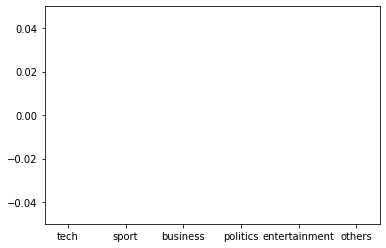

In [40]:
plt.bar(range(len(categories_occurences)), list(categories_occurences.values()), tick_label=list(categories_occurences.keys()))
plt.margins(0)
plt.show()

## Analytics


In [39]:
for website_name, link in website_list.items():
    for key,value in categories_statistics.items():
        path = result_path + '/'+website_name+'/texts/'+ key +".txt"
        if not os.path.isfile(path): continue
        text = open(path , "r", encoding='utf-8')
        text = text.read()
        categories_statistics[key] = Fun.get_statistics(text, value)

print( categories_statistics)

{'tech': {' and ': 168, ' or ': 11, ' nor ': 0, ' if ': 1, ' because ': 8, ' unless ': 0}, 'sport': {' and ': 310, ' or ': 31, ' nor ': 2, ' if ': 7, ' because ': 8, ' unless ': 0}, 'business': {' and ': 100, ' or ': 0, ' nor ': 0, ' if ': 0, ' because ': 1, ' unless ': 0}, 'politics': {' and ': 0, ' or ': 0, ' nor ': 0, ' if ': 0, ' because ': 0, ' unless ': 0}, 'entertainment': {' and ': 1240, ' or ': 508, ' nor ': 0, ' if ': 56, ' because ': 54, ' unless ': 56}, 'others': {' and ': 192, ' or ': 24, ' nor ': 0, ' if ': 12, ' because ': 15, ' unless ': 0}}


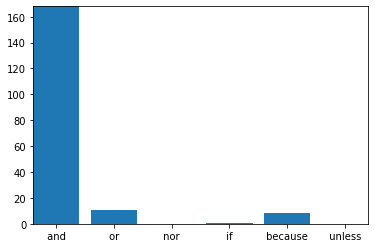

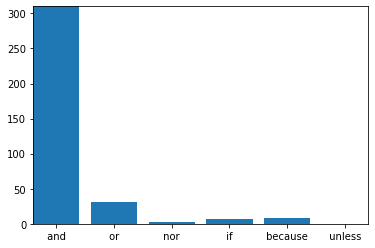

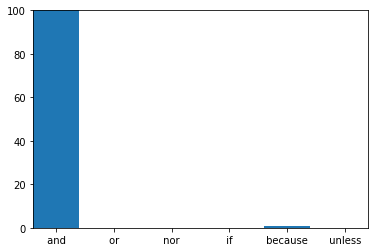

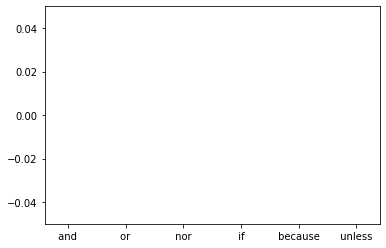

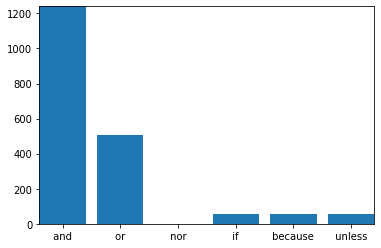

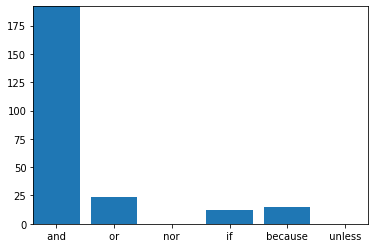

In [44]:

for key,value in categories_statistics.items():
    plt.bar(range(len(value)), list(value.values()), tick_label=list(value.keys()))
    plt.margins(0)
    plt.show()